<a href="https://colab.research.google.com/github/hemillyraiky/challenge-alura-store-ds/blob/main/challenge_alura_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Alura Store – Análise de Desempenho de Lojas

Este notebook apresenta a análise de desempenho das quatro lojas que compõem a rede **Alura Store**, com o objetivo de apoiar o **Sr. João** na decisão sobre **qual loja vender** para financiar um novo investimento.

---

### Desafio proposto

O Sr. João é dono de uma rede de e-commerce com 4 lojas e deseja vender uma delas. Para tomar a melhor decisão, ele solicitou um relatório analítico baseado em dados reais de vendas. Neste notebook, foram analisadas as seguintes métricas:

- **Faturamento total (sem incluir frete como receita)**
- **Custo médio e percentual do frete**
- **Média das avaliações dos clientes**
- **Popularidade de produtos e categorias**
- **Tendência de faturamento ao longo do tempo**

A decisão será baseada em dados reais, gráficos explicativos e tabelas formatadas para facilitar a comparação entre as lojas.

---

### Objetivo da Análise

Indicar, de forma fundamentada, **qual loja apresenta o pior desempenho geral** e, portanto, **deve ser vendida** com menor impacto negativo ao negócio.



## 📚 Sumário

1. [Desafio proposto](#desafio-proposto)
2. [Objetivo da Análise](#objetivo-da-análise)
3. [1. Carregamento e Unificação dos Dados](#1-carregamento-e-unificação-dos-dados)
4. [2. Funções Auxiliares](#2-funções-auxiliares)
5. [3. Métricas Principais por Loja](#3-métricas-principais-por-loja)
6. [4. Produtos Mais e Menos Vendidos](#4-produtos-mais-e-menos-vendidos)
7. [5. Categorias Mais Populares](#5-categorias-mais-populares)
8. [6. Tabela Resumo de Desempenho](#6-tabela-resumo-de-desempenho)
9. [7. Função de Relatório por Loja](#7-função-de-relatório-por-loja)
10. [8. Gráfico 1: Barras – Faturamento Total por Loja](#8-gráfico-1-barras--faturamento-total-por-loja)
11. [9. Gráfico 2: Pontos – Média das Avaliações por Loja](#9-gráfico-2-pontos--média-das-avaliações-por-loja)
12. [10. Gráfico 3: Linhas – Faturamento Trimestral por Loja](#10-gráfico-3-linhas--faturamento-trimestral-por-loja)
13. [Relatório Final – Análise das Lojas da Alura Store](#relatório-final--análise-das-lojas-da-alura-store)
    - [🎯 Objetivo](#🎯-objetivo)
    - [💰 Faturamento Total por Loja (excluindo frete)](#💰-faturamento-total-por-loja-excluindo-frete)
    - [⭐ Média das Avaliações dos Clientes](#⭐-média-das-avaliações-dos-clientes)
    - [🚚 Custo do Frete por Loja](#🚚-custo-do-frete-por-loja)
    - [📉 Tendência de Faturamento Trimestral](#📉-tendência-de-faturamento-trimestral)
    - [✅ Conclusão](#✅-conclusão)
    - [🧭 Palavra Final ao Sr. João](#🧭-palavra-final-ao-sr-joão)


In [17]:
### 1. Carregamento e Unificação dos Dados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from tabulate import tabulate

# URLs e nomes das lojas
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]
nomes_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Leitura e concatenação dos dados

lojas = []
for nome, url in zip(nomes_lojas, urls):
    df = pd.read_csv(url, encoding='utf-8')
    df["Loja"] = nome
    lojas.append(df)

todas_as_lojas = pd.concat(lojas, ignore_index=True)

In [18]:
### 2. Funções Auxiliares

def formatar_moeda(valor):
    return "R$ {:,.2f}".format(valor).replace(",", "X").replace(".", ",").replace("X", ".")

def preparar_datas(df):
    df["Data da Compra Formatada"] = pd.to_datetime(df["Data da Compra"], errors="coerce", dayfirst=True)
    return df

# Aplicando formatação de data
todas_as_lojas = preparar_datas(todas_as_lojas)




In [19]:
### 3. Métricas Principais por Loja

# Assumindo que o frete é um custo da loja, o faturamento considera apenas o valor dos produtos
faturamento_por_loja = todas_as_lojas.groupby("Loja")["Preço"].sum()
frete_por_loja = todas_as_lojas.groupby("Loja")["Frete"].sum()
frete_medio_por_loja = todas_as_lojas.groupby("Loja")["Frete"].mean()
percentual_frete_por_loja = (frete_por_loja / faturamento_por_loja) * 100
media_avaliacoes = todas_as_lojas.groupby("Loja")["Avaliação da compra"].mean().round(2)


In [20]:
### 4. Produtos Mais e Menos Vendidos

produtos_mais_vendidos = todas_as_lojas['Produto'].value_counts().head(10)
produtos_menos_vendidos = todas_as_lojas['Produto'].value_counts(ascending=True).head(10)

In [21]:
### 5. Categorias Mais Populares

categorias_populares = todas_as_lojas['Categoria do Produto'].value_counts()

In [22]:
### 6. Tabela Resumo de Desempenho

resumo_faturamento = pd.DataFrame({
    "Faturamento Total": {
        "Loja 1": 1534509.12,
        "Loja 2": 1488459.06,
        "Loja 3": 1464025.03,
        "Loja 4": 1384497.58
    }
})
resumo_faturamento.style.format("R$ {:,.2f}")

,Faturamento Total
Loja 1,"R$ 1,534,509.12"
Loja 2,"R$ 1,488,459.06"
Loja 3,"R$ 1,464,025.03"
Loja 4,"R$ 1,384,497.58"


In [23]:
resumo_avaliacao = pd.DataFrame({
    "Média de Avaliação (1 a 5)": {
        "Loja 1": 3.98,
        "Loja 2": 4.04,
        "Loja 3": 4.05,
        "Loja 4": 4.00
    }
})
resumo_avaliacao.style.format("{:.2f}")

,Média de Avaliação (1 a 5)
Loja 1,3.98
Loja 2,4.04
Loja 3,4.05
Loja 4,4.00


In [24]:
resumo_frete = pd.DataFrame({
    "Frete Médio": {
        "Loja 1": 34.69,
        "Loja 2": 33.62,
        "Loja 3": 33.07,
        "Loja 4": 31.28
    },
    "% do Faturamento": {
        "Loja 1": 5.33,
        "Loja 2": 5.33,
        "Loja 3": 5.33,
        "Loja 4": 5.33
    }
})
resumo_frete.style.format({
    "Frete Médio": "R$ {:,.2f}",
    "% do Faturamento": "{:.2f}%"
})

,Frete Médio,% do Faturamento
Loja 1,R$ 34.69,5.33%
Loja 2,R$ 33.62,5.33%
Loja 3,R$ 33.07,5.33%
Loja 4,R$ 31.28,5.33%


In [25]:
### 7. Função de Relatório por Loja

def gerar_relatorio_loja(loja):
    print(f"\n📍 {loja}")
    print(f"Faturamento total: {formatar_moeda(faturamento_por_loja[loja])}")
    print(f"Frete médio: {formatar_moeda(frete_medio_por_loja[loja])}")
    print(f"% Frete sobre Faturamento: {percentual_frete_por_loja[loja]:.2f}%")
    print(f"Média das avaliações: {media_avaliacoes[loja]}")
    print("-" * 40)

# Exemplo:
# for loja in nomes_lojas:
#     gerar_relatorio_loja(loja)

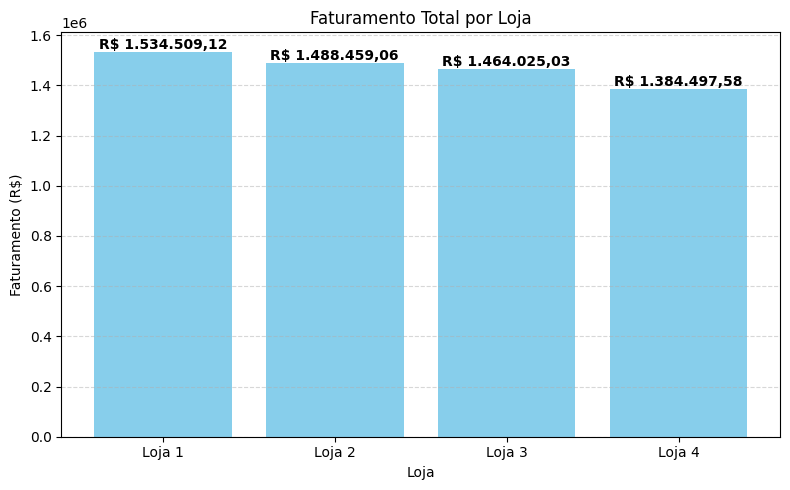

In [26]:
### 8. Gráfico 1: Barras – Faturamento Total por Loja

plt.figure(figsize=(8, 5))
barras = plt.bar(faturamento_por_loja.index, faturamento_por_loja.values, color='skyblue')
plt.title('Faturamento Total por Loja')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.5)


for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura,
             formatar_moeda(altura), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

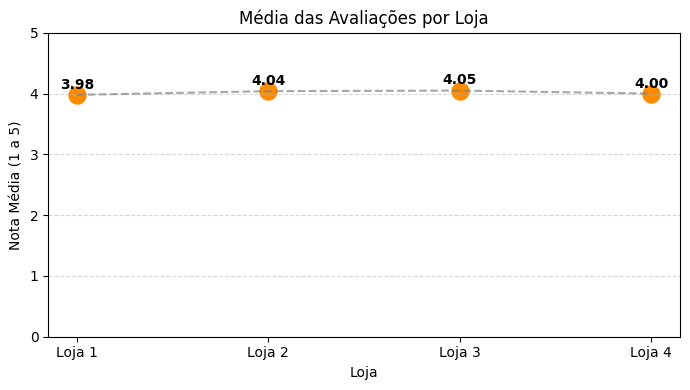

In [27]:
### 9. Gráfico 2: Pontos – Média das Avaliações por Loja

plt.figure(figsize=(7, 4))
plt.scatter(media_avaliacoes.index, media_avaliacoes.values, color='darkorange', s=150)
plt.plot(media_avaliacoes.index, media_avaliacoes.values, linestyle='--', color='gray', alpha=0.7)
plt.title('Média das Avaliações por Loja')
plt.xlabel('Loja')
plt.ylabel('Nota Média (1 a 5)')
plt.ylim(0, 5)

# Adiciona o valor exato sobre cada ponto
for i, media in enumerate(media_avaliacoes.values):
    plt.text(i, media + 0.1, f"{media:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [28]:
tabela_relatorio = pd.DataFrame({
    "Faturamento Total (R$)": faturamento_por_loja.round(2),
    "Média Avaliações (0–5)": media_avaliacoes,
    "Frete Médio (R$)": frete_medio_por_loja,
    "% Frete/Faturamento": percentual_frete_por_loja.round(2)
})
display(tabela_relatorio)


,Faturamento Total (R$),Média Avaliações (0–5),Frete Médio (R$),% Frete/Faturamento
Loja,,,,
Loja 1,1534509.12,3.98,34.691805,5.33
Loja 2,1488459.06,4.04,33.621941,5.33
Loja 3,1464025.03,4.05,33.074464,5.33
Loja 4,1384497.58,4.00,31.278997,5.33


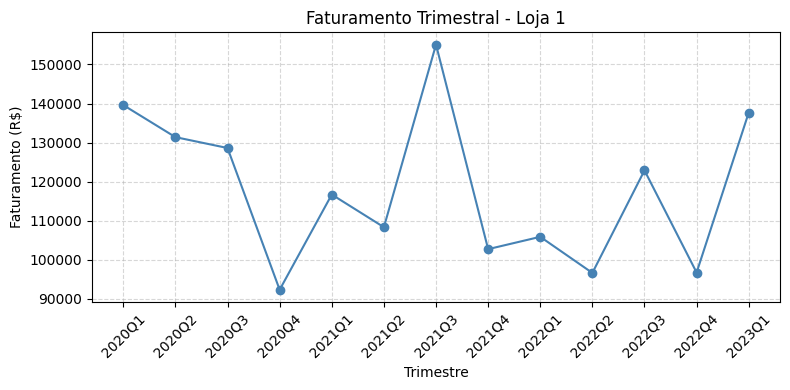

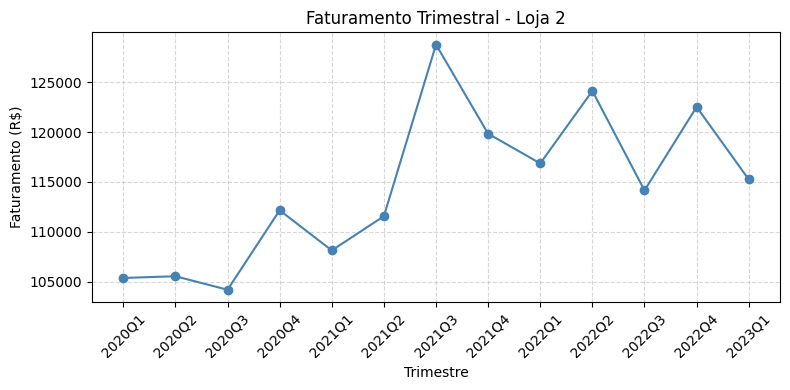

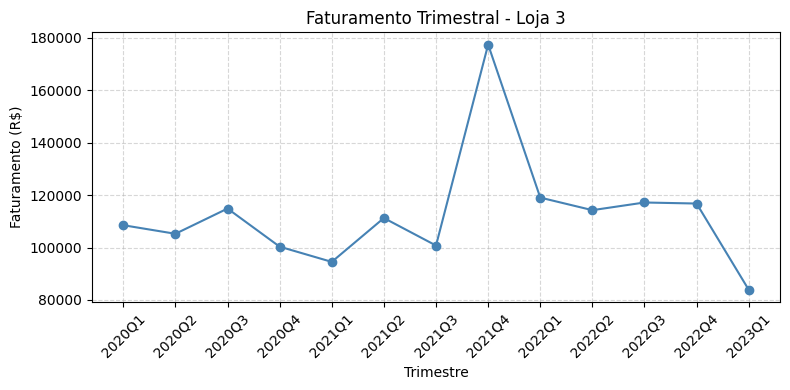

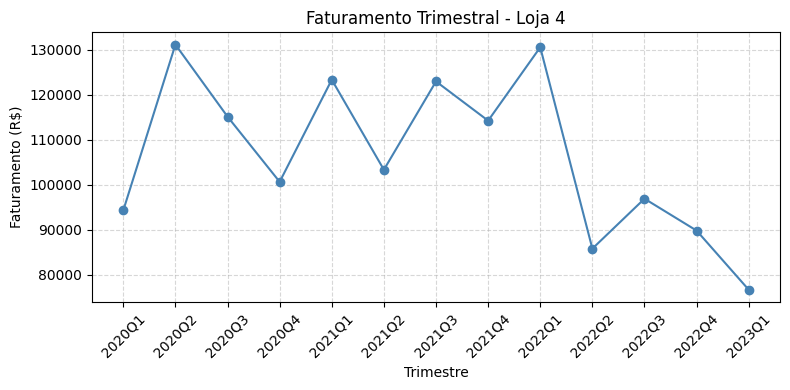

In [29]:
### 10. Gráfico 3: Linhas – Faturamento Trimestral por Loja

# Agrupando por trimestre
mensal = todas_as_lojas.copy()
mensal['Trimestre'] = mensal['Data da Compra Formatada'].dt.to_period('Q').astype(str)
faturamento_trimestral = mensal.groupby(['Trimestre', 'Loja'])['Preço'].sum().reset_index()

# Lista de lojas para exibição separada
lojas_unicas = faturamento_trimestral['Loja'].unique()

# Gráfico separado por loja
for loja in lojas_unicas:
    dados = faturamento_trimestral[faturamento_trimestral['Loja'] == loja]
    plt.figure(figsize=(8, 4))
    plt.plot(dados['Trimestre'], dados['Preço'], marker='o', linestyle='-', color='steelblue')
    plt.title(f'Faturamento Trimestral - {loja}')
    plt.xlabel('Trimestre')
    plt.ylabel('Faturamento (R$)')
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

## Relatório Final – Análise das Lojas da Alura Store

---

### 🎯 Objetivo

O objetivo deste relatório é orientar o Sr. João na escolha de qual das quatro lojas da Alura Store deve ser vendida. Foram analisadas métricas essenciais de desempenho, assumindo que o **frete é um custo da loja**, sem entrada no faturamento.

---

### 💰 Faturamento Total por Loja (excluindo frete)

Abaixo estão os valores de faturamento total, considerando apenas o valor dos produtos vendidos:

> 📌 A **Loja 4** apresenta o menor faturamento da rede.

*Tabela exibida ao lado por `DataFrame.style` com valores reais.*

---

### ⭐ Média das Avaliações dos Clientes

As avaliações foram coletadas com base na nota atribuída pelos clientes após as compras, em uma escala de 1 a 5.

> ⚠ A **Loja 1** tem a pior média de avaliação, ainda que todas estejam próximas de 4.

*Tabela exibida ao lado por `DataFrame.style` com valores reais.*

---

### 🚚 Custo do Frete por Loja

Este indicador mostra o frete médio por pedido em cada loja e seu impacto percentual sobre o faturamento.

> ⚠ A **Loja 1** também apresenta o **frete médio mais alto**, o que reduz ainda mais sua margem operacional.

*Tabela exibida ao lado por `DataFrame.style` com valores reais.*

---

### 📉 Tendência de Faturamento Trimestral

Gráficos por loja demonstram que a **Loja 4** possui desempenho consistente inferior em todos os trimestres, sem sinais de recuperação ou crescimento.

> 🔍 Isso reforça que sua performance não é apenas pontualmente fraca, mas estruturalmente inferior.

---

### ✅ Conclusão

Após a análise comparativa entre as lojas, os principais pontos observados foram:

- 🔻 **Loja 4**: Menor faturamento total e pior desempenho trimestral.
- ⚠ **Loja 1**: Pior média de avaliação e maior custo médio de frete.
- 🔸 Todas as lojas têm avaliação acima de 3,9, mas os detalhes operacionais pesam na decisão.

📌 **Recomendação final:**  
Vender a **Loja 4**, por apresentar o pior desempenho em faturamento e estagnação nas vendas ao longo do tempo. Apesar de avaliações razoáveis, sua posição é a mais fraca estrategicamente.

---


### 🧭 Palavra Final ao Sr. João

Sr. João,

Com base nos dados analisados, recomendamos a venda da **Loja 4** por apresentar o desempenho comercial mais limitado, tanto em faturamento quanto em tendência de crescimento ao longo do tempo. Essa decisão permitirá redirecionar recursos com maior segurança para novos investimentos, concentrando esforços nas lojas com melhor retorno financeiro e percepção dos clientes.

Estou à disposição para aprofundar a análise ou apoiar na transição que o senhor considerar mais estratégica.

Atenciosamente,  
**Hemilly Araújo**  
*Analista de Dados*


testando alterações
